# plot matrices

In a plot matrix, a grid of plots is generated. Unlike a faceted plot where each subplot is based on one subset of the data, each subplot in a plot matrix is based on the whole data, but with two different variables on the axes. Each row and column corresponds with one variable.

Along the diagonal, the row variable and column variable match up. A univariate plot of each variable is usually placed along this diagonal line. A plot matrix is good for getting a broad overview of pairwise relationships between variables.

Considering that the size of ach subplot will be fairly small, it is used an an initial exploratory tool to lead you to points of furthur interest.  Follow up plot matrix by generating additional plots of specific variable sets on their own. 

We can also adopt heatmaps to depict pairwise correlations between variables in our data. Like the plot matrix, each row and column corresponds with a single variable. The value and color depicted in each cell is the correlation between the corresponding row and column variables. 

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# load data
pokemon = pd.read_csv('../1. Data Files/pokemon.csv')

In [3]:
# data info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [4]:
# data head
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [5]:
pokemon.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


We are interested in looking at the pairwise relationships between the six combat statistics for all pokemon  

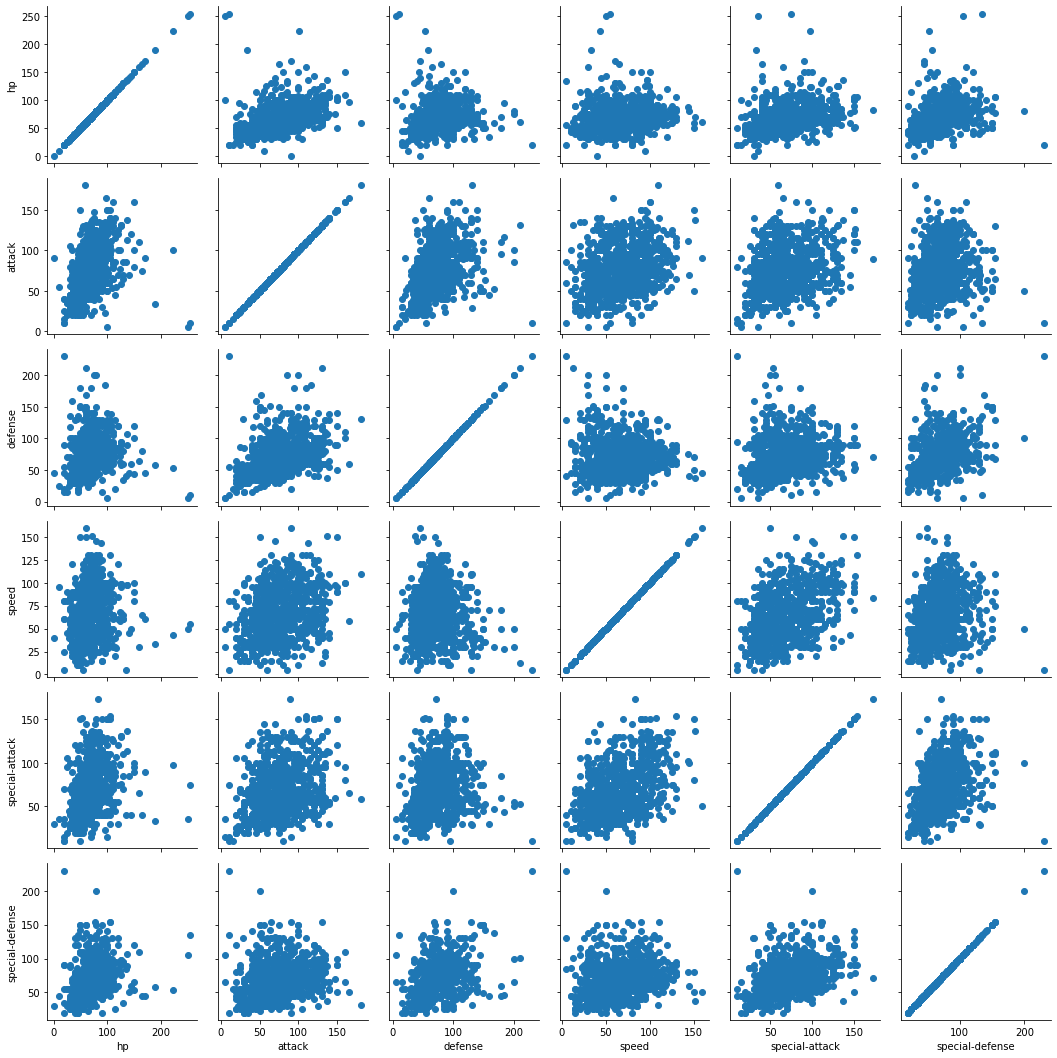

In [6]:
pkmn_stats=['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g=sb.PairGrid(data=pokemon, vars=pkmn_stats);
g.map(plt.scatter);

lets use the map_diag method to put histograms on the diagonal, 

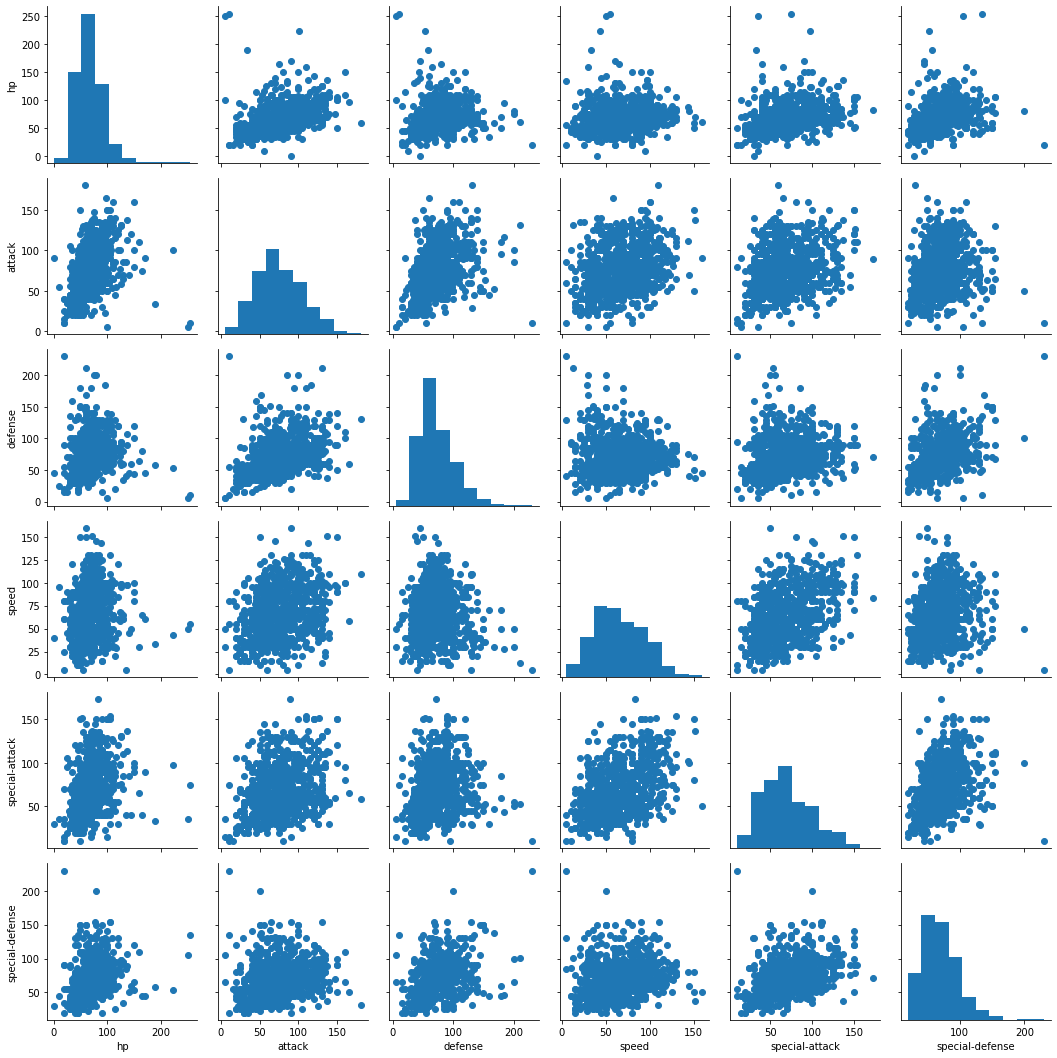

In [7]:
pkmn_stats=['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g=sb.PairGrid(data=pokemon, vars=pkmn_stats);
g=g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

We can see a strong correlation between : hp & attack, attack & defense, special attack & special defense. Lets check this numerically by computing and plotting the correlation in a correlation heat map.

In [8]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


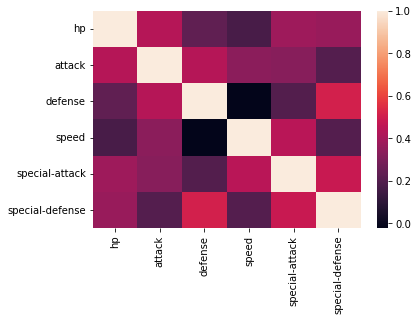

In [9]:
sb.heatmap(pokemon[pkmn_stats].corr());

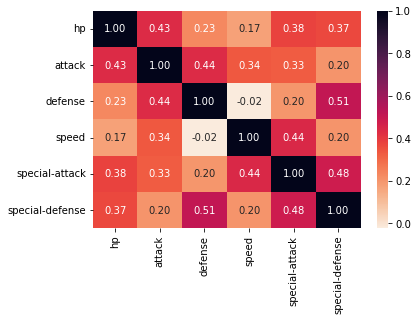

In [10]:
# rotate the color mapping, set annotations to two decimal places
sb.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f');

Only one correlation is negative, between defense and speed Since it is essentially zero, lets add  vmin argument to set the lower bound of the colormap to zero.

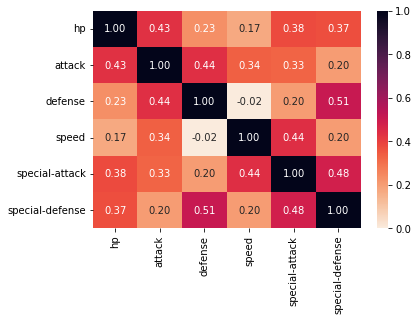

In [11]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=0);

The correlation heatmap supports the observations we made from the plot matrix. We see that there are relatively high correlation values between hp and attack, attack and defense, special attack and special defense. But it looks like there is a surprisingly high correlation between defense and special defense. Perherps there is an outlier boosting this statistic. Make furthur investigations. 